# The Perceptron



# Structure



We start our Machine Learning tour with an simple model that elegantly demonstrates the general model that supervised learning models follow. 

As a binary classifier, the perceptron acts similarly to a biological neuron. It takes in several inputs, or features, and the neuron will either activate or not activate. Let's take a closer look:

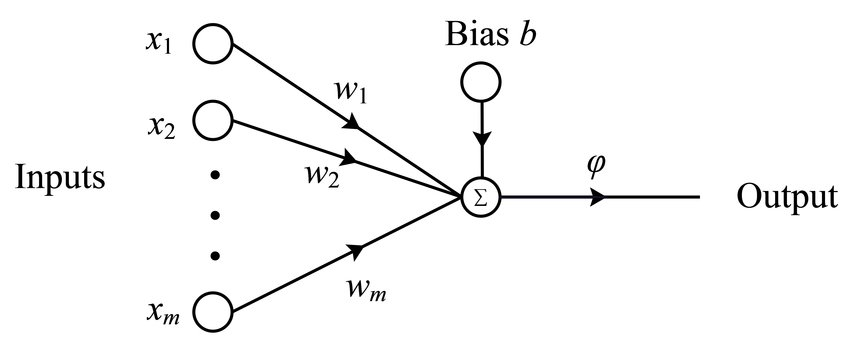

Visual found at https://www.researchgate.net/figure/The-graph-of-a-perceptron-x1-xm-are-input-signals-w1-wm-are-the-weights_fig1_327392288

Here, $x_1, x_2, ... , x_m$ are multiplied by their respective weights and summed with the bias, $b$ to create a preactivation value. As the bias can also be considered an input to the neuron with weight $1$, we can assign helpful notation: Let the vector of $x$'s and $b$ be denoted as $\bar{x}$, let the vector of weights with a $1$ appended to the end be denoted as $\bar{w}$, and let the preactivation value be denoted $z$. Then, $z= \bar{x}^T \bar{w}$.

Finally, an activation function is applied to this value. In the case of the perceptron, we can perform binary classification with a simple sign function. The mathematically inclined audience may recognize that this multiple step process effectively defines a halfspace of the feature space. What does this imply about the perceptron's uses?

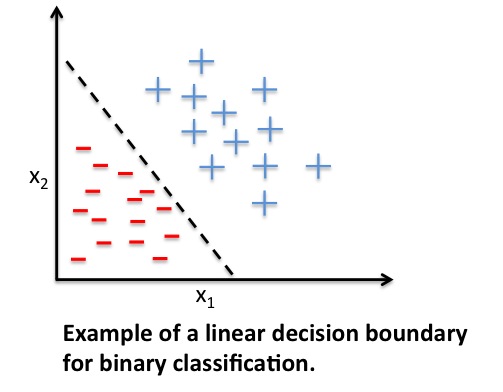

Visual found at https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

As the image above demonstrates, the perceptron, if weighted correctly, can separate the feature space into a partition representing a binary classification. This means that a properly weighted perceptron can take a vector of features and classify it. As the visual indicates, this classification will be perfect for datasets where there is a separating hyperplane between the two classes. It seems like two questions remain: how does the percptron learn the correct weights, and how do we determine what weights are best in the case where the feature data cannot be perfectly separated by a hyperplane? The answer to both has to do with cost.

Let's loosely go over the math behind cost so we can quickly move on to interesting data! 

We can quantify how bad a set of weights are for a dataset using squared error; that is, let $C(w,b) = \frac{1}{4} \sum_{i=1}^N(\hat{y}^{(i)}-y^{(i)})^2$ where $\hat{y}$ is the output of the model and $y$ is the correct output.  Consider the update rule: 

$\bar{w} \leftarrow \bar{w} - \alpha (\hat{y}^{(i)}-y^{(i)}) \bar{x}^{(i)}$ where $0 < \alpha < 1$ is the learning rate.

The reasoning behind this update rule is left as an exercise to the reader. (Hint: Consider the case where the perceptron is wrong, e.g.  $z= \bar{x}^T \bar{w} < 0$ but $y=1$ and recall $\bar{x}^T \bar{w} = |\bar{x}||\bar{w}|cos\theta$ or consider the gradient of the cost function.

This update rule will minimize the cost function over many iterations. So, the perceptron model is able to learn the best separating hyperplane according to the loss function. We can easily implement this model in Python:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define Perceptron class
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            print(f"epoch: {epoch}, errors: {errors}")
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Application and Analysis

We will be testing how well the perceptron can predict if a college basketball team makes it to the Sweet 16 (trademarked or whatever, please don't sue me, NCAA). We'll be using data from the cbb dataset and only considering a few columns.

In [ ]:
# Load the dataset
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/Datasets/cbb.csv"
df = pd.read_csv(url)
# df.drop not in tournament
df = df.dropna()

# let's take a look
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


We will consider 7 statistics as features and if the team made it to at least the Sweet Sixteen as our $y$

In [ ]:
# Extract the relevant columns
X = df.iloc[:, [2,3,15,16,17,18,22]].values
y = df.iloc[:, 21].values

# Convert labels to binary classification task
y = [1 if yval in ('Champions', '2ND', 'F4', 'E8', 'S16') else -1 for yval in y]

In [ ]:
# more preprocessing

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

And now we can train our model.

In [ ]:
# Train the Perceptron model
ppn = Perceptron(epochs=2000, eta=0.1)
ppn.train(X_train_std, y_train)

errors = ppn.errors_

epoch: 0, errors: 62
epoch: 1, errors: 49
epoch: 2, errors: 52
epoch: 3, errors: 50
epoch: 4, errors: 53
epoch: 5, errors: 51
epoch: 6, errors: 50
epoch: 7, errors: 53
epoch: 8, errors: 53
epoch: 9, errors: 54
epoch: 10, errors: 49
epoch: 11, errors: 54
epoch: 12, errors: 52
epoch: 13, errors: 55
epoch: 14, errors: 45
epoch: 15, errors: 49
epoch: 16, errors: 54
epoch: 17, errors: 55
epoch: 18, errors: 59
epoch: 19, errors: 52
epoch: 20, errors: 45
epoch: 21, errors: 51
epoch: 22, errors: 49
epoch: 23, errors: 56
epoch: 24, errors: 51
epoch: 25, errors: 48
epoch: 26, errors: 49
epoch: 27, errors: 53
epoch: 28, errors: 57
epoch: 29, errors: 44
epoch: 30, errors: 50
epoch: 31, errors: 51
epoch: 32, errors: 57
epoch: 33, errors: 51
epoch: 34, errors: 51
epoch: 35, errors: 49
epoch: 36, errors: 48
epoch: 37, errors: 52
epoch: 38, errors: 56
epoch: 39, errors: 47
epoch: 40, errors: 54
epoch: 41, errors: 52
epoch: 42, errors: 49
epoch: 43, errors: 49
epoch: 44, errors: 42
epoch: 45, errors: 5

Now, let's evaluate our model.

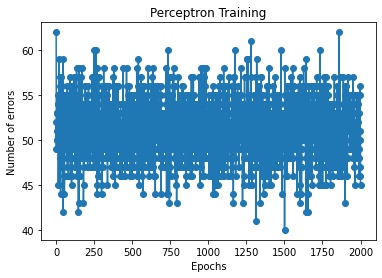

Accuracy: 0.8881118881118881
Confusion Matrix:
 [[101   4]
 [ 12  26]]


In [ ]:
# Plot the number of errors per epoch
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron Training')
plt.show()

# Test the model
y_pred = ppn.predict(X_test_std)

# Compute the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Test Accuracy:', accuracy)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

The training plot depicting number of errors over epochs shows that the perceptron has a ceiling for how well it can fit the data. This has two interpretations:

1. The perceptron is resistant to overfitting
2. The perceptron is not complex enough to model complex data

The perceptron's accuracy on the testing data was very impressive, which demonstrates the power of such a simple tool; however, tasksare typically more difficult than binary classification, so while the perceptronhas shown its worth, it is time to move on to more complex models.